# Lesson 5 - Starter Code

In [1]:
# Usual imports
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# New! We'll demo a couple nice dataviz libraries today
from ggplot import *  # may need to pip install ggplot
import seaborn as sns

In [2]:
# Plot matplotlib plots & set the seaborn plotting style
%matplotlib inline
sns.set_style("darkgrid")

In [4]:
# We're going to use pathlib for relative paths to our datasets folder (this is a built-in library in Python3)
# If running this line throws an error, may need to do: `pip install pathlib` from CLI
# For more info see: https://pypi.python.org/pypi/pathlib/
from pathlib import Path
DATA_DIR = Path('./resources')  # If you're not executing from the repo, you can just hardcode your data dir
print "DATA_DIR:", DATA_DIR
print "CSV filepath:", DATA_DIR / 'msleep.csv'  # pathlib resolves this to OS-relative path to '../../datasets/DAT-8/msleep.csv'

DATA_DIR: resources
CSV filepath: resources\msleep.csv


In [5]:
# Read in the mammal dataset
mammals = pd.read_csv(DATA_DIR / 'msleep.csv')  # pandas will happily accept a pathlib Path() object
# If this throws an error, you may need to upgrade your version of pandas to 0.18.0
mammals.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000


In [6]:
# Remove rows where `brainwt` is missing
mammals = mammals[mammals.brainwt.notnull()].copy()

### Explore our mammals dataset

In [7]:
mammals.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NaN,NaN,21.0,0.09820,14.800


### Lets check out a scatter plot of body weight and brain weight

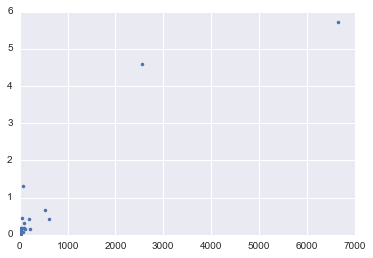

In [8]:
# Create a matplotlib figure
plt.figure()
# Generate a scatterplot inside the figure
plt.plot(mammals.bodywt, mammals.brainwt, '.')
# Show the plot
plt.show()

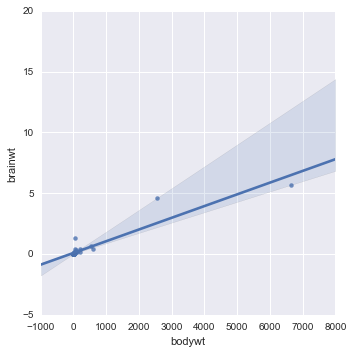

In [9]:
# Do it using the Seaborn library (if a FutureWarning pops up, you can ignore this, re-execute to clear it)
# https://web.stanford.edu/~mwaskom/software/seaborn/generated/seaborn.lmplot.html
sns.lmplot('bodywt', 'brainwt', mammals)

Notice:
1. The lmplot() function returns a straight line. That is why it is a linear solution. If we had multiple variables, the solution would be a linear plane.
2. The linear solution does explain a portion of the data well, but because both "bodywt" and "brainwt" are log-log distributions, outliers effect the weight of the solution poorly. We can see this from the wide and inconsistently shaped confidence intervals that seaborn's lmplot generates.

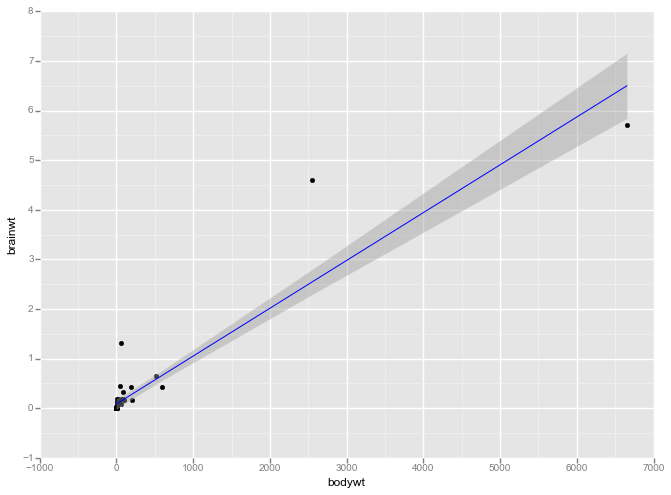

<ggplot: (12076169)>

In [11]:
# Do it using the ggplot library (as above, run twice to clear the FutureWarning)
# http://ggplot.yhathq.com/docs/geom_point.html
ggplot(aes(x='bodywt', y='brainwt'), data=mammals) + \
    geom_point() + \
    stat_smooth(method='lm', colour='blue')

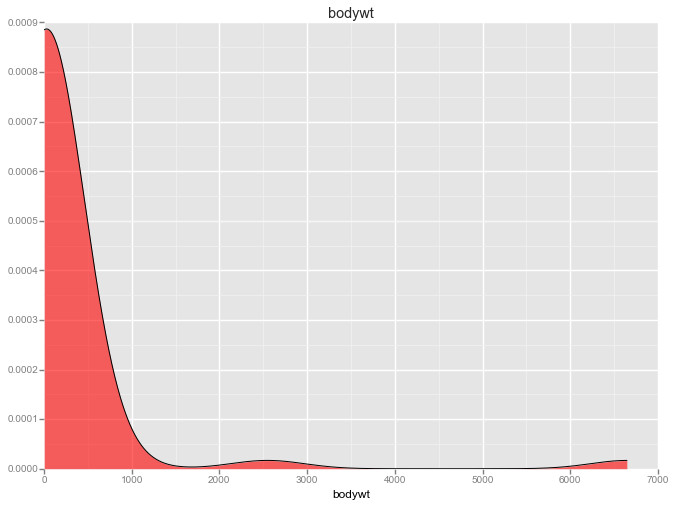

<ggplot: (15280413)>


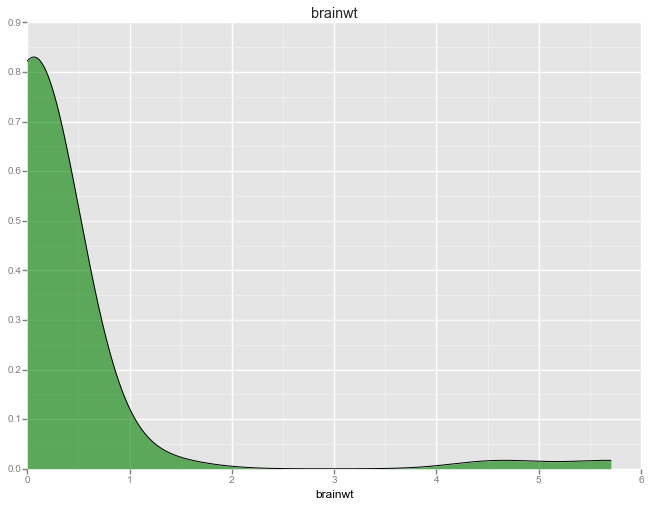

<ggplot: (12422190)>


In [12]:
# bodywt and brainwt look like they may not be normally distributed, let's check that
print ggplot(aes(x='bodywt'), data=mammals) + geom_density(alpha=0.6, colour='black', fill='red') + ggtitle('bodywt')
print ggplot(aes(x='brainwt'), data=mammals) + geom_density(alpha=0.6, colour='black', fill='green') + ggtitle('brainwt')

Because both variables are a log-log distribution, some properties of the underlying maths allow us to transform them into normal distributions. Then, we can solve for the linear regression!

In [13]:
# Let's try log-transforming bodywt and brainwt
log_columns = ['bodywt', 'brainwt']
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)

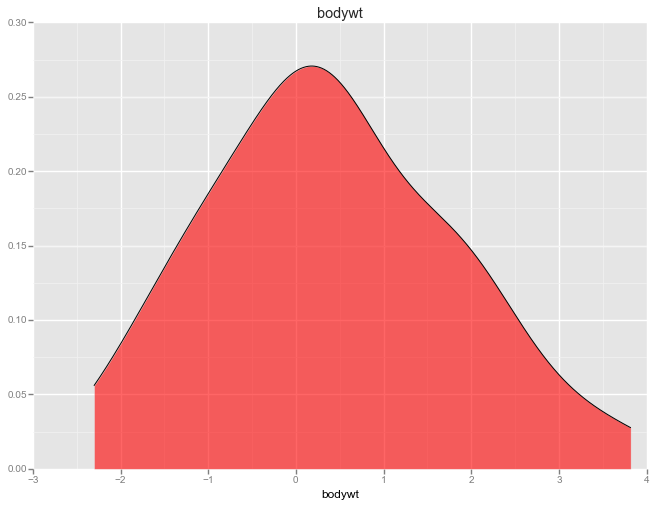

<ggplot: (12353579)>


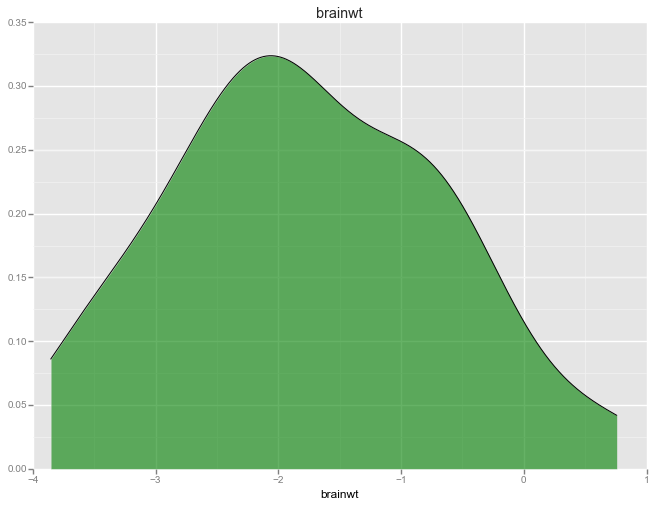

<ggplot: (15619742)>


In [14]:
# This looks better
print ggplot(aes(x='bodywt'), data=log_mammals) + geom_density(alpha=0.6, colour='black', fill='red') + ggtitle('bodywt')
print ggplot(aes(x='brainwt'), data=log_mammals) + geom_density(alpha=0.6, colour='black', fill='green') + ggtitle('brainwt')

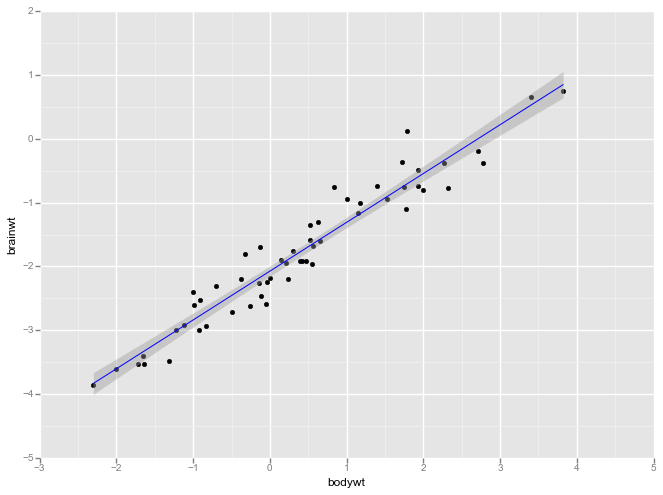

<ggplot: (12353565)>

In [15]:
# Look at the log-transformed scatter
ggplot(aes(x='bodywt', y='brainwt'), data=log_mammals) + \
    geom_point() + \
    stat_smooth(method='lm', colour='blue')

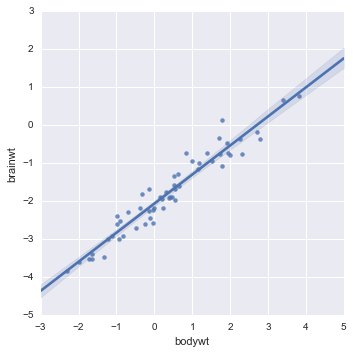

In [16]:
# Can also do this with Seaborn
sns.lmplot('bodywt', 'brainwt', log_mammals)

N.B. Even though we changed the way the data was shaped, this is still a linear result: it's just linear in the log10 of the data, instead of in the data's natural state.

## Guided Practice: Using ggplot to generate single variable linear model plots
Update and complete the code below to use lmplot and display correlations between body weight and two dependent variables: sleep_rem and awake.

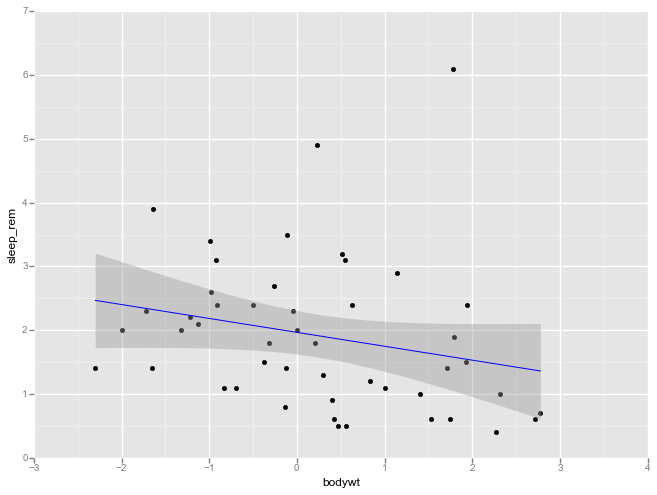

<ggplot: (8937290)>


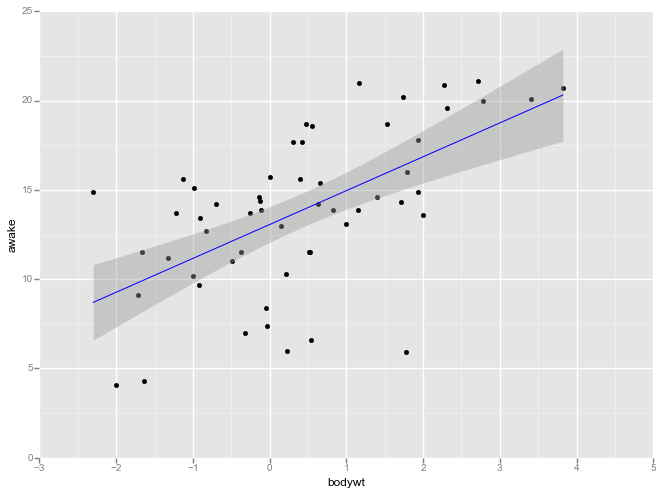

<ggplot: (12196735)>


In [29]:
log_columns = ['bodywt', 'brainwt',]  # any others?
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)

# Add code here to create two graphs displaying correlations between sleep_rem and awake (as y) and body weight (as x)
y_vals = ['sleep_rem','awake']
for y in y_vals:
    print ggplot(aes(x='bodywt', y=y), data=log_mammals) + \
        geom_point() + \
        stat_smooth(method='lm', colour='blue')

## Introduction: Single Regression Analysis in statsmodels & scikit

In [31]:
# This is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

X = mammals[['bodywt']]
y = mammals['brainwt']

# Create a fitted model in one line with the following syntax formula:
#     outcome ~ predictor1 + predictor2 ... predictorN

lm = smf.ols(formula='y ~ X', data=mammals).fit()
# Print the full linear model summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     367.7
Date:                Thu, 15 Sep 2016   Prob (F-statistic):           9.16e-26
Time:                        15:43:40   Log-Likelihood:                -20.070
No. Observations:                  56   AIC:                             44.14
Df Residuals:                      54   BIC:                             48.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0859      0.048      1.782      0.080        -0.011     0.183
X              0.0010   5.03e-05     19.176      0.000         0.001     0.001
==============================================================================
Omnibus:                       85.068   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1330.630
Skew:                           4.258   Prob(JB):                    1.14e-289
Kurtosis:                      25.311   Cond. No.                         981.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Use Statsmodels to make the prediction for a mammal with bodyweight = 50

In [32]:
# You have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'X': [50]})
X_new.head()

,X
0,50


In [33]:
lm.predict(X_new)

array([ 0.13411477])

### Repeat in Scikit with handy plotting

When modelling with sklearn, you'll use the following basic principles:

- All sklearn estimators (modelling classes) follow the same "base estimator" design. This allows you to easily rotate through estimators without changing much code.
- All estimators take a matrix X (can be either sparse or dense).
- Many estimators also take a vector of outcome labels, y, when working on a supervised machine learning problem. Regressions are supervised learning because we already have examples of our outcome variable y for every row in X.
- All estimators have parameters that can be set. This allows for customization and higher level of detail to the learning process. The parameters are unique to each estimator algorithm.
- Finally, note the convention of capital letters for a matrix (e.g. X) vs lower case for a vector (e.g. y).

In [36]:
# Online documentation is very handy! http://scikit-learn.org/stable/modules/linear_model.html
from sklearn import feature_selection, linear_model

# Create matrix of features (only one used for now) + vector of outcome labels
X = mammals[['bodywt']]
y = mammals['brainwt']

# Create instance of LinearRegression class and fit model to the data
lm = linear_model.LinearRegression()
lm.fit(X, y)
print "lm:"
print lm
print

print "lm.coef_"
print lm.coef_
print

print "residuals"
print (y - lm.predict(X)).values

lm:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

lm.coef_
[ 0.00096395]

residuals
[ -7.08800059e-02  -8.56456253e-02  -2.41286847e-01  -2.94125995e-02
  -1.98375886e-03  -3.20960941e-03  -8.11190653e-02  -7.99221690e-02
  -8.49751472e-02  -8.02812595e-02  -8.57821300e-02  -7.84911326e-02
  -7.64609605e-02  -8.12560240e-02   2.06190401e+00  -8.56394811e-02
   6.68651423e-02   1.52824184e-01  -8.31595512e-02   1.94431974e-02
  -6.34983427e-02  -8.11101001e-02   1.57147005e-01  -7.61776770e-02
   1.17431784e+00  -7.88035469e-01   8.65278350e-02  -8.50329842e-02
  -8.55385172e-02  -8.56769498e-02  -7.47668392e-02  -7.62271834e-02
   3.55835076e-02   3.03764540e-01  -2.53122330e-02   6.97574310e-02
  -8.40474824e-02  -7.60789080e-02  -6.27542639e-02  -6.83875275e-02
  -8.43257740e-02  -6.66335246e-02  -8.47896065e-02  -8.48799748e-02
  -8.30349121e-02  -8.11041436e-02  -8.20146692e-02  -8.56335799e-02
   1.09420689e-02  -6.52550818e-02  -1.16937739e-01  -8.

In [38]:
# Let's wrap this into a function that's model-independent

def get_linear_model_metrics(X, y, algo):
    """
    Get the p-value of X given y, ignore f-stat for now
    """
    pvals = feature_selection.f_regression(X, y)[1]
    # Start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y - algo.predict(X)).values

    # Print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)

    # Visualise distribution of the residuals
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(y))))
    plt.title("Distribution of residuals")
    
    # Keep the model
    return algo


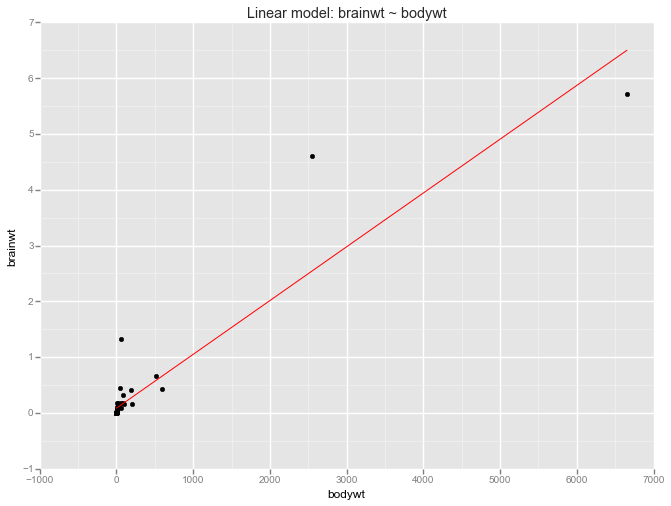

<ggplot: (15842575)>
P Values: [  9.15540205e-26]
Coefficients: [ 0.00096395]
y-intercept: 0.0859173102936
R-Squared: 0.871949198087


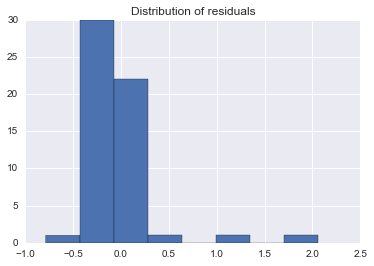

In [39]:
# Let's try it out by building a linear model representing brainwt ~ bodywt
# (remember this model is represented as: `brainwt = bodywt * coefficient + intercept`)
X = mammals[['bodywt']]
y = mammals['brainwt']

# Let's visualise this model too
print (ggplot(aes(x='bodywt', y='brainwt'), data=mammals) +
    geom_point() +
    stat_smooth(method='lm', colour='red', se=False) +
    ggtitle("Linear model: brainwt ~ bodywt"))

lm = linear_model.LinearRegression()
lm = get_linear_model_metrics(X, y, lm)  # note how lm object is passed into the function, then returned

## Demo: Significance is Key

### What does our output tell us?

Answer: Very small but statistically significant effect.

### Evaluating Fit, Evaluating Sense

Although we know there is a better solution to the model, we should evaluate some other "common sense" things first. For example, given this model, what is an animal's brainwt if their bodywt is 0?

In [40]:
# What's the prediction at 0? Does it make sense?
print lm.predict([[0]])

[ 0.08591731]


P Values: [  9.15540205e-26]
Coefficients: [ 0.00098291]
y-intercept: 0.0
R-Squared: 0.864418807451


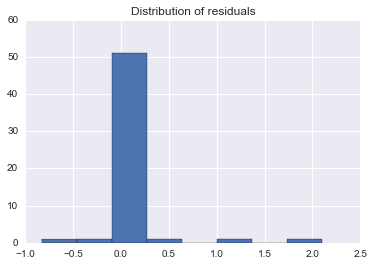

In [41]:
# A mammal with zero body weight should also have zero brain weight!

# Let's force the intercept to be zero & retrain the model
lm = linear_model.LinearRegression(fit_intercept=False)
lm = get_linear_model_metrics(X, y, lm)

In [42]:
# What's the prediction at 0 now?
print lm.predict([[0]])

[ 0.]


## Intrepretation
With linear modeling we call this part of the linear assumption. Consider it a test to the model. If an animal's body weights nothing, we expect their brain to be nonexistent. That given, we can improve the model by telling sklearn's LinearRegression object we do not want to fit a y intercept.

Now, the model fits where brainwt = 0, bodywt = 0.
Because we start at 0, the large outliers have a greater effect, so the coefficient has increased.
Fitting with this assumption also results in a model that explains slightly less of the variance.

## Guided Practice: Using the LinearRegression object

We learned earlier that the data in its current state does not allow for the best linear regression fit. 

With a partner, generate two more models using the log-transformed data to see how this transform changes the model's performance.

Complete the following code to update X and y to match the log-transformed data. Complete the loop by setting the list to be one True and one False.

y-intercept: True
P Values: [  3.56282243e-33]
Coefficients: [ 0.76516177]
y-intercept: -2.07393164084
R-Squared: 0.931851615367

y-intercept: False
P Values: [  3.56282243e-33]
Coefficients: [ 0.35561441]
y-intercept: 0.0
R-Squared: -2.41053211437



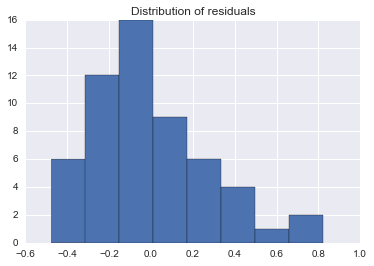

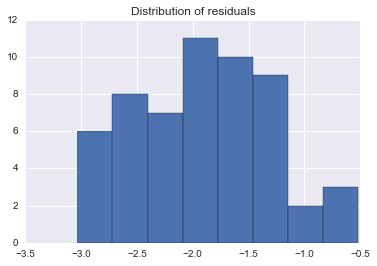

In [46]:
# Starter
X = log_mammals[['bodywt']]
y = log_mammals['brainwt']
loop = [True,False]
for boolean in loop:
    print 'y-intercept:', boolean
    lm = linear_model.LinearRegression(fit_intercept=boolean)
    get_linear_model_metrics(X, y, lm)
    print

### Which model performed the best? The worst? Why?


Answer: y-intercept = False because much better R-squared.

For more information on how scikit-learn's LinearRegression calculates R-squared, see:
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

_"Best possible R^2 score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0._

### Advanced Methods! 

We will go over different estimators in detail in the future but check it out in the docs if you're curious (and finish a little early)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
P Values: [  3.56282243e-33]
Coefficients: [ 0.23454772]
y-intercept: -1.85931606304
R-Squared: 0.483728109403



Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
P Values: [  3.56282243e-33]
Coefficients: [ 0.75797972]
y-intercept: -2.07102674342
R-Squared: 0.931769516561



ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
P Values: [  3.56282243e-33]
Coefficients: [ 0.39504621]
y-intercept: -1.9242323166
R-Squared: 0.71382228495





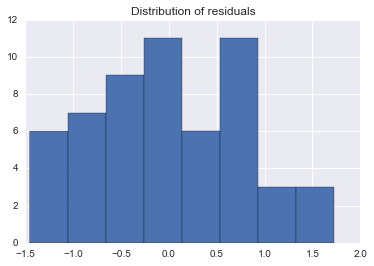

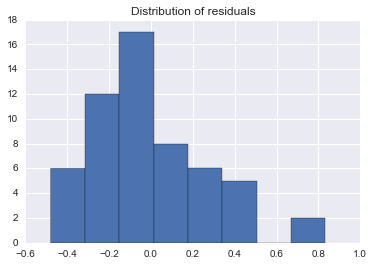

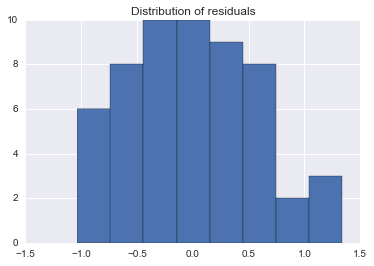

In [47]:
# Loading other sklearn regression estimators
X = log_mammals[['bodywt']]
y = log_mammals['brainwt']

# Docs = http://scikit-learn.org/stable/modules/linear_model.html
estimators = [
    linear_model.Lasso(),
    linear_model.Ridge(),
    linear_model.ElasticNet(),
]

for est in estimators:
    print est
    get_linear_model_metrics(X, y, est)
    print "\n\n"

## Introduction: Multiple Regression Analysis using citibike data


In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

For example, a house's price may be best measured by square feet, but a lot of other variables play a vital role: bedrooms, bathrooms, location, appliances, etc. 

For a linear regression, we want these variables to be largely independent of each other, but all of them should help explain the y variable.

We'll work with bikeshare data to showcase what this means and to explain a concept called multicollinearity.

For more details on this dataset, including a data dictionary, please see: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [48]:
bike_data = pd.read_csv(DATA_DIR / 'bikeshare.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### What is multicollinearity?

With the bike share data, let's compare three data points: actual temperature (**`temp`**), "feel" temperature (**`atemp`**), and guest ridership (**`casual`**).

Our data is already normalized between 0 and 1, so we'll start off with the correlations and modelling.

            temp     atemp    casual
temp    1.000000  0.987672  0.459616
atemp   0.987672  1.000000  0.454080
casual  0.459616  0.454080  1.000000
Axes(0.125,0.125;0.62x0.775)


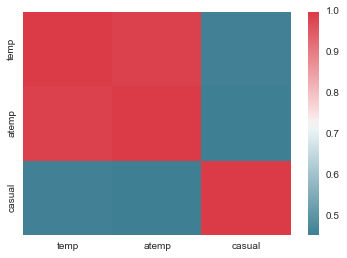

In [49]:
colour_map = sns.diverging_palette(220, 10, as_cmap=True)

correlations = bike_data[['temp', 'atemp', 'casual']].corr()
print correlations
print sns.heatmap(correlations, cmap=colour_map)

### What does the correlation matrix explain?

Answer: The correlation value between 0 and 1 for each of the variables selected for the visualisation. In this case *temp* and *atemp* are highly correlated, and there is a smaller correlation (~.5) between *temp* / *atemp* and *casual*.

## We can measure this effect in the coefficients:



Model: casual ~ temp
P Values: [ 0.]
Coefficients: [ 117.68705779]
y-intercept: -22.812739188
R-Squared: 0.21124654163

Model: casual ~ atemp
P Values: [ 0.]
Coefficients: [ 130.27875081]
y-intercept: -26.3071675481
R-Squared: 0.206188705733

Model: casual ~ temp + atemp
P Values: [ 0.  0.]
Coefficients: [ 116.34021588    1.52795677]
y-intercept: -22.8703398286
R-Squared: 0.21124723661



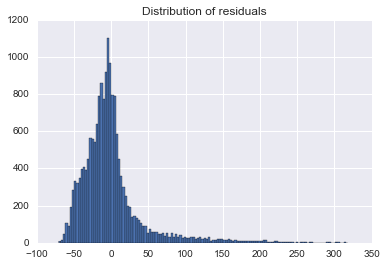

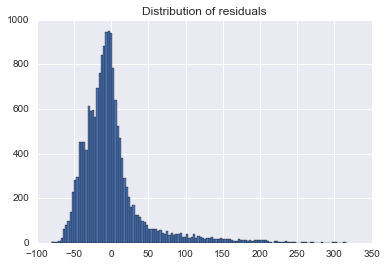

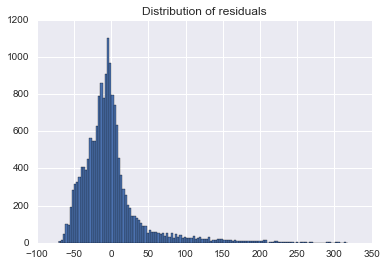

In [50]:
y = bike_data['casual']
x_sets = (
    ['temp'],
    ['atemp'],
    ['temp', 'atemp'],
)

for x in x_sets:
    print 'Model: casual ~ ' + ' + '.join(x)
    get_linear_model_metrics(bike_data[x], y, linear_model.LinearRegression())
    print

###  Intrepretation?

Answer: Both variables have roughly similar coefficients when modelled on their own, but when combined this changes drastically.

### What happens if we use a second variable that isn't highly correlated with temperature, like humidity?


Axes(0.125,0.125;0.62x0.775)
P Values: [ 0.  0.]
Coefficients: [ 112.02457031  -80.87301833]
y-intercept: 30.7273338581
R-Squared: 0.310901196913


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

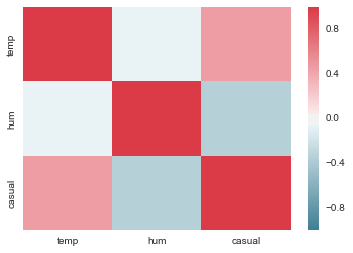

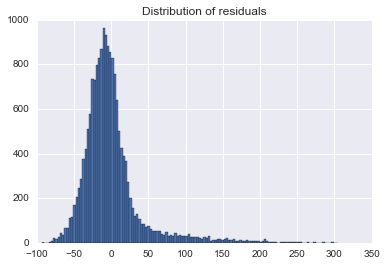

In [51]:
print sns.heatmap(bike_data[['temp', 'hum', 'casual']].corr(),
                  cmap=colour_map)

y = bike_data['casual']
x = bike_data[['temp', 'hum']]
get_linear_model_metrics(x, y, linear_model.LinearRegression())

## Guided Practice: Multicollinearity with dummy variables

There can be a similar effect from a feature set that is a singular matrix. This happens is when there is a clear relationship in the matrix (for example, the sum of all rows = 1).

### Run through the following code on your own.
#### What happens to the coefficients when you include all weather situations instead of just including all except one?

In [52]:
# From https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
# weathersit : 
# - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
weather = pd.get_dummies(bike_data.weathersit)
print weather.head()
bike_data.head()

     1    2    3    4
0  1.0  0.0  0.0  0.0
1  1.0  0.0  0.0  0.0
2  1.0  0.0  0.0  0.0
3  1.0  0.0  0.0  0.0
4  1.0  0.0  0.0  0.0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55   2.46181288e-01]
Coefficients: [  2.34550988e+13   2.34550988e+13   2.34550988e+13   2.34550988e+13]
y-intercept: -2.34550987861e+13
R-Squared: 0.0233354132913


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

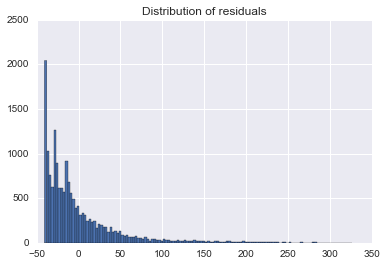

In [53]:
# Model casual by all weather situations as dummy variables
lm = linear_model.LinearRegression()
get_linear_model_metrics(weather[[1, 2, 3, 4]], y, lm)

P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55]
Coefficients: [ 37.87876398  26.92862383  13.38900634]
y-intercept: 2.66666666663
R-Squared: 0.0233906873841


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

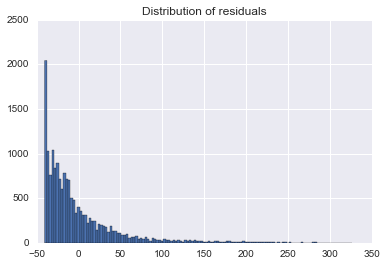

In [54]:
# Drop the least significant: weather situation  = 4
get_linear_model_metrics(weather[[1, 2, 3]], y, lm)

### Similar in Statsmodels

In [55]:
# All dummies in the model
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3, 4]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     104.0
Date:                Thu, 15 Sep 2016   Prob (F-statistic):           1.13e-87
Time:                        16:43:54   Log-Likelihood:                -92197.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17374   BIC:                         1.844e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                -3.319e+12   5.17e+13     -0.064      0.949     -1.05e+14  9.79e+13
weather[[1, 2, 3, 4]][0]  3.319e+12   5.17e+13      0.064      0.949     -9.79e+13  1.05e+14
weather[[1, 2, 3, 4]][1]  3.319e+12   5.17e+13      0.064      0.949     -9.79e+13  1.05e+14
weather[[1, 2, 3, 4]][2]  3.319e+12   5.17e+13      0.064      0.949     -9.79e+13  1.05e+14
weather[[1, 2, 3, 4]][3]  3.319e+12   5.17e+13      0.064      0.949     -9.79e+13  1.05e+14
==============================================================================
Omnibus:                     8995.399   Durbin-Watson:                   0.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58868.810
Skew:                           2.467   Prob(JB):                         0.00
Kurtosis:                      10.547   Cond. No.                     3.88e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.78e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [56]:
# Drop one
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     138.7
Date:                Thu, 15 Sep 2016   Prob (F-statistic):           8.08e-89
Time:                        16:43:56   Log-Likelihood:                -92197.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17375   BIC:                         1.844e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 2.6667     28.134      0.095      0.924       -52.478    57.812
weather[[1, 2, 3]][0]    37.8788     28.138      1.346      0.178       -17.274    93.031
weather[[1, 2, 3]][1]    26.9286     28.143      0.957      0.339       -28.235    82.092
weather[[1, 2, 3]][2]    13.3890     28.164      0.475      0.635       -41.814    68.592
==============================================================================
Omnibus:                     9001.632   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58962.554
Skew:                           2.468   Prob(JB):                         0.00
Kurtosis:                      10.553   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### What's the interpretation ? Do you want to keep all your dummy variables or drop one? Why? 




Answer: Drop one - otherwise the coefficients make no sense.

## Guided Practice: Combining non-correlated features into a better model

In [57]:
bike_data.dtypes

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.


instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## With a partner, complete this code together and visualize the correlations of all the numerical features built into the data set.

We want to:

- Add the three significant weather situations into our current model.
- Find two more features that are not correlated with current features, but could be strong indicators for predicting guest riders.

In [ ]:
# Starter 
lm = linear_model.LinearRegression()
bikemodel_data = bike_data.join()  # add in the three weather situations here

colour_map = sns.diverging_palette(220, 10, as_cmap=True)
correlations =  # what are we getting the correlations of?
print correlations
print sns.heatmap(correlations, cmap=colour_map)

columns_to_keep = []  #[which variables?]
final_feature_set = bikemodel_data[columns_to_keep]

get_linear_model_metrics(final_feature_set, y, lm)

In [ ]:
# Using sklearn + log-transformed y
final_feature_set = bikemodel_data[columns_to_keep]
get_linear_model_metrics(final_feature_set, np.log10(y + 1), lm)

In [ ]:
# Using Statsmodels + log-transformed y
log_y = np.log10(y + 1)
lm = smf.ols(formula='log_y ~ temp + hum + windspeed + weather_1 + weather_2 + weather_3 + holiday + hour_1 + hour_2 + hour_3 + hour_4 + hour_5 + hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + hour_16 + hour_18 + hour_19 + hour_20 + hour_21 + hour_22 + hour_23', data=bikemodel_data).fit()
# Print the full summary
lm.summary()

## Independent Practice: Building models for other y variables

We've completed a model together that explains casual guest riders. Now it's your turn to build another model, using a different y variable: registered riders.

#### Pay attention to:

* the distribution of riders (should we rescale the data?)
* checking correlations with variables and registered riders
* having a feature space (our matrix) with low multicollinearity
* model complexity vs explanation of variance: at what point do features in a model stop improving r-squared?
* the linear assumption -- given all feature values being 0, should we have no ridership? negative ridership? positive ridership?

#### Bonus

* Which variables would make sense to dummy (because they are categorical, not continuous)?
* What features might explain ridership but aren't included in the data set?
* Is there a way to build these using pandas and the features available?
* Outcomes: If your model at least improves upon the original model and the explanatory effects (coefficients) make sense, consider this a complete task.

### If your model for registered riders has an r-squared above .4, this a relatively effective model for the data available. Kudos!

In [ ]:
# Model away!

